1. 
2. 
3. 
4. 
5. 
6. 
7. 
8. 
9. 
10. 
11. 
12. 
13. 
14. 
15. 
16. 
17. 
18. 
19. 

## SQS:
What is a queue?
- FIFO (First-In First-Out)
- Queue store messages (data)


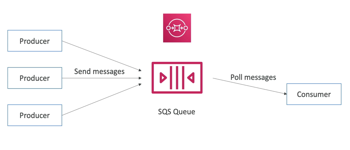

In [2]:
from PIL import Image 
from IPython.display import display

img = Image.open('sqs.jpeg')
new_image = img.resize((350, 150))
display(new_image)

### SQS:
- Oldest AWS service
- Decouple application
- fully managed service
- unlimited throughput & unlimited number of messages in queue
- Default retention of messages in queue is 4 days and maximum of 14 days
- low latency
- limitation of 256KB per message
- can consist of duplicate messages
- Messages coming into the queue are not ordered as processed (best effort ordering)

#### Producing Messages:
- Message allowed size 256KB
- Producer sends messages to SQS via SDK (SendMessage API)
- The message sent to SQS queue persists for 4 days default (max 14 days) until the consumer reads and deletes the message
- Example message
    - order id
    - customer id
    - any attributes we want


#### Consuming Messages:
- Consumers (running on EC2 instances, AWS Lambda, Server)
- Poll SQS for messages (receive up to 10 messages at a time)
- Process messages (insert messages into RDS Database)
    - If not processed by consumer within 10 seconds, the message is sent back to SQS queue and it again polls the message and retries it until consumed.
    - If it fails continuously and breaches the limit, the message is moved to DLQ queue (Dead Letter Queue).
- After processing, deletes the messages using DeleteMessage API

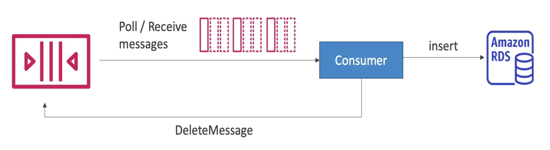

In [3]:
from PIL import Image 
from IPython.display import display

img = Image.open('consumer.jpeg')
new_image = img.resize((550, 150))
display(new_image)

##### Multiple EC2 Instances Consumer:
- Consumer receiver and process messages in parallel
- Each Consumer will receive a set of messages 
    - Consumer A: receive a,b,c,d,e,f,g,h,i,j
    - Consumer B: receive k,l,m,n,o,p,q,r,s,t
    - Consumer C: receive u,v,w,x,y,z,a1,b1,c1,d1 
- If a message is not processed by a consumer for a period of time
    - Then the message will be sent to other consumers
    - If it still not consumed, then the message will be sent to a dead letter queue (DLQ)

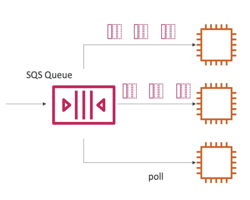

In [4]:
from PIL import Image 
from IPython.display import display

img = Image.open('multiconsumer.jpeg')
new_image = img.resize((250, 200))
display(new_image)

#### SQS with Auto Scaling:
- Used for scaling up or down if we have high or low throughput of messages

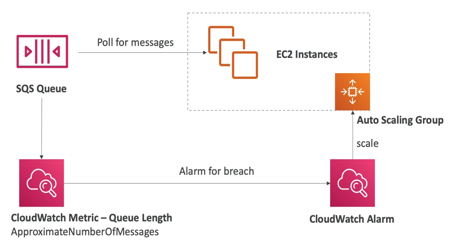

In [5]:
from PIL import Image 
from IPython.display import display

img = Image.open('asg.jpeg')
new_image = img.resize((450, 250))
display(new_image)

#### SQS - Decoupling Application tier:

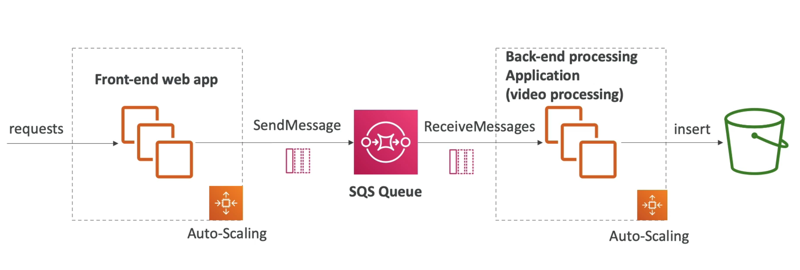

In [6]:
from PIL import Image 
from IPython.display import display

img = Image.open('decouple.jpeg')
new_image = img.resize((800, 270))
display(new_image)

#### SQS Security:
- Encryption:
    - In-Flight (HTTPS API)
    - At rest (using KMS keys)
    - Client Side

- Access Controls:
    - IAM policies to regulate access to SQS APIs
    - SQS Access Policies similar to (S3 bucket policies)
        - cross account access to SQS queues
        - allow other services (SNS, S3, etc) to write to an SQS queue

#### Setup SQS Queue:
- Go to SQS console
- Create Queue
    - Type
        - Standard (message order not preserved, atleast once delivery)
        - FIFO (message order preserved, exactly once processing)
    - Name
    - Configuration
        - Visibility Timeout
        - Message retention period
        - Delivery Delay
        - Maximum Message Size
        - Receive Message wait time
    - Encryption
        - Server-Side
            - Amazon SQS Key (SSE-SQS)
            - AWS Key Management Service (SSE-KMS)
                - custom master key
                - description
                - account
                - CMK ARN
                - Data key re-use period
    - Access Policy:
        - Method
            - Basic *
            - Advanced
        - Define who can send messages to queue
            - only owner
            - only specified IAM user, roles, specified AWS account
        - Define who can receive messages to queue
            - only owner
            - only specified IAM user, roles, specified AWS account
    - Re-drive Allow Policy
    - Dead Letter Queue 
    - Tags
    - Create


#### Overview of SQS Queue:
Options of newly created SQS queue:

- SNS Subscription
- Lambda Trigger
- Dead Letter Queue
- Monitoring
- Tagging
- Access Policy
- Encryption
- Dead Letter queue re-drive tasks

##### To send test message:
- Go to SQS console
- After creating the Queue, click on Send/Receive Messages (top-right)
    - Send Message
        - Message body
        - Delivery delay
        - Message attributes
            - Name
            - Type
                - String
                - Integer
            - Custom Type
            - Value
            - Add New Attributes

##### To receive test message:
- Go to SQS console
- After creating the Queue, click on Send/Receive Messages (top-right)
    - Receive Message
        - Poll for Message
        - Poll Settings
            - Message Available
            - Polling duration
            - Maximum message count
            - Polling progress
        - Messages

#### Purge the SQS Queue:
- Go to SQS console
- After creating the Queue, click on Purge (top-right)
- This will enable us to delete all the messages in the queue

#### SQS Queue Policy:

Cross Account:
- The below SQS Policy is attached to the first account that end with "...6666"


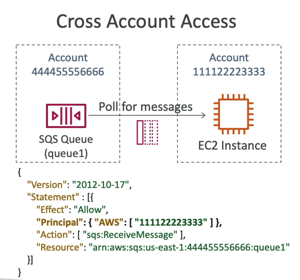

In [7]:
from PIL import Image 
from IPython.display import display

img = Image.open('Policy.jpeg')
new_image = img.resize((300, 280))
display(new_image)

Publish S3 notifications to SQS Queue:

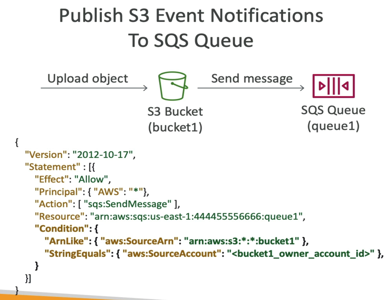

In [8]:
from PIL import Image 
from IPython.display import display

img = Image.open('s3.jpeg')
new_image = img.resize((390, 300))
display(new_image)

#### Setup SQS Queue Policy:
- Go to SQS console
- Create Queue
    - Go to Access Policy
        - Basic
            - Send & Receive
                - only Queue owner
                - specified AWS accounts, IAM users, IAM roles (ARNs)
        - Advanced
        

##### SQS Queue Policy (Advanced option):

In [9]:
{
    "Version": "2012-10-17",
    "Id": "example-ID",
    "Statement": [
        {
            "Sid": "example-statement-ID",
            "Effect": "Allow",
            "Principal": {
                "Service": "s3.amazonaws.com"
            },
            "Action": [
                "SQS:SendMessage"
            ],
            "Resource": "SQS-queue-ARN",
            "Condition": {
                "ArnLike": {
                    "aws:SourceArn": "arn:aws:s3:*:*:awsexamplebucket1"
                },
                "StringEquals": {
                    "aws:SourceAccount": "bucket-owner-account-id"
                }
            }
        }
    ]
}

{'Version': '2012-10-17',
 'Id': 'example-ID',
 'Statement': [{'Sid': 'example-statement-ID',
   'Effect': 'Allow',
   'Principal': {'Service': 's3.amazonaws.com'},
   'Action': ['SQS:SendMessage'],
   'Resource': 'SQS-queue-ARN',
   'Condition': {'ArnLike': {'aws:SourceArn': 'arn:aws:s3:*:*:awsexamplebucket1'},
    'StringEquals': {'aws:SourceAccount': 'bucket-owner-account-id'}}}]}

##### Create a bucket for SQS Queue Policy Example:
- Create a bucket
- Go inside the created bucket, Go to Properties
    - Create Event notification
        - Name
        - Event type
            - All objects create event, etc
        - Destination
            - SQS Queue
                - Event from S3
    - Create (will have issues if we don't set the correct SQS Queue Policy)

#### SQS Message Visibility Timeout:
- After a message is polled by consumer, then it will not be shown to other consumers
- default visibility timeout 30 seconds
- After 30 seconds of visibility timeout, the message will be visible in SQS Queue if not processed
- Sometimes, if a message needs more time to process the message, consumer could call the ChangeMessageVisibility API to get more visibility timeout time period.
- If visibility time high (hours), then if consumer crashes, re-processing of message will take time
- If visibility time (~ 5 seconds), then it will create duplicates

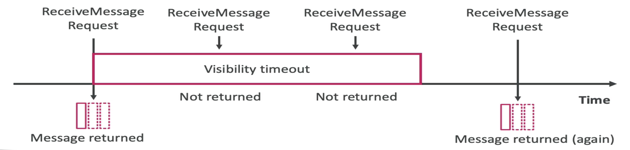

In [10]:
from PIL import Image 
from IPython.display import display

img = Image.open('visibility.jpeg')
new_image = img.resize((630, 150))
display(new_image)

#### SQS Dead Letter Queues:
- If a consumer fails to process a message, the messages goes back to the queue to be re-processed
- We can set a threshold (MaximumReceives) of how many times for the message to be processed during failure.
- If the threshold is exceeded then it will go to DLQ (Dead Letter Queue)
- It is used for Debugging
- While setting up DLQ of FIFO queue should also be FIFO queue
- Likewise setting up DLQ of Standard queue should also be Standard queue
- Make sure to process the messages in DLQ before expiring otherwise the messages will be deleted
    - Keep the retention to 14 days for DLQ

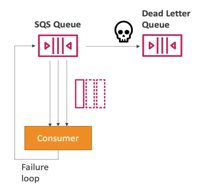

In [11]:
from PIL import Image 
from IPython.display import display

img = Image.open('re-process.jpeg')
new_image = img.resize((200, 190))
display(new_image)

##### DLQ - Redrive to Source:
- Feature to process messages from DLQ
- First, we manually inspect and debug the message in DLQ
- Then, fix the issue and re-drive the messages from DLQ back to source Queue for processing

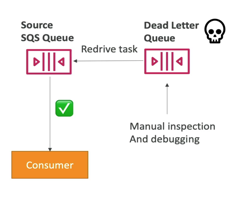

In [12]:
from PIL import Image 
from IPython.display import display

img = Image.open('redrive.jpeg')
new_image = img.resize((240, 200))
display(new_image)

##### Setup SQS DLQ:
- Go to SQS console
- Create Queue
    - Fill the necessary information for the DLQ SQS
    - Create
- Go to the created SQS Source queue and Edit
    - Go to DLQ
        - Enable
        - SQS DLQ Queue ARN
        - Maximum Receives threshold

##### Setup DLQ - Re-drive:
- Open the created DLQ SQS Queue and go to DLQ messages 
- Click on start re-drive
    - Re-drive to Source 
    - Re-drive to Custom destination
        - Select Queue
    - Velocity Control Settings (rate of messages per second)
        - system optimized
        - custom max velocity (max 500 messages per second)
    - inspect messages
        - poll for messages
        - edit poll settings
    - messages
    - DLQ re-drive
- Go to Dead-Letter queue re-drive tasks tab (to check re-drive task status)


#### SQS Delay Queues:
- Delay a message up to 15 minutes (consumers dont see the messages immediately)
- Default 0 seconds
- Set default delay for all messages in a queue
- Can override default delay time using DelaySeconds parameter

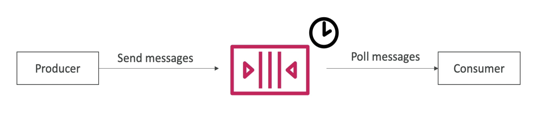

In [13]:
from PIL import Image 
from IPython.display import display

img = Image.open('delay.jpeg')
new_image = img.resize((540, 120))
display(new_image)

##### Setup SQS - Delay:
- Go to SQS console
- Create Queue
    - Under configuration
        - Delivery Delay
            - Seconds (default 0)

#### SQS Certified Developer Concepts:
##### Long Polling:
- When a consumer requests messages from the queue, it can optionally wait for the message to arrive, if there are none in the queue. This is called Long Polling
- Long Polling decreases the number of API calls made to SQS while increasing the efficiency and decreasing the latency of the application
- The wait time can be between 1 - 20 secs
- Long Polling is preferred instead of Short Polling
- This can be applied at queue level or at API level using ReceiveMessageWaitTimeSeconds

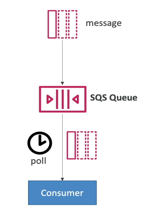

In [14]:
from PIL import Image 
from IPython.display import display

img = Image.open('poll.jpeg')
new_image = img.resize((150, 220))
display(new_image)

##### Setup Short/Long Polling:
- Go to SQS console
- Create Queue
    - Under configuration
        - Receive Message Wait Time
            - Seconds (default 20)

##### SQS Extended Client:
- Message size limit is 256 kb, but if we want to send message of size 1GB?
    - Use SQS Extended Client (Java Library)

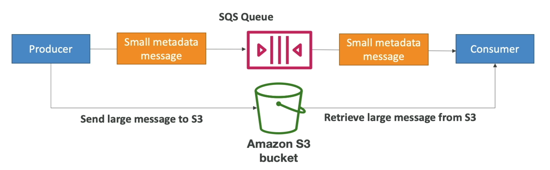

In [15]:
from PIL import Image 
from IPython.display import display

img = Image.open('sqsextended.jpeg')
new_image = img.resize((550, 170))
display(new_image)

##### SQS APIs:
- CreateQueue (args: MessageRetentionPeriod)
- PurgeQueue (delete all messages from queue)
- SendMessage (args: DelaySeconds)
- ReceiveMessage
- DeleteMessage
- MaxNumberOfMessages (default 1, max 10 for ReceiveMessage API)
- ReceiveMessageWaitTimeSeconds (Long Polling)
- ChangeMessageVisibility (change message timeout)

Note:
- We can use Batch API calls for SendMessage, DeleteMessage, ChangeMessageVisibility helps decrease your cost

#### SQS FIFO Queues:
- The messages are ordered in the queue
- Exactly one send capability
- Limited throughput: 300 msgs/sec without batching, with batching its 3000 msgs/sec

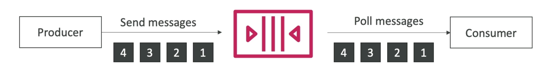

In [16]:
from PIL import Image 
from IPython.display import display

img = Image.open('sqsFIFO.jpeg')
new_image = img.resize((550, 70))
display(new_image)

##### Setup FIFO SQS Queue:
- Go to SQS console
- Create Queue
    - Under Type
        - FIFO 
    - Configuration
        - The same options available as Standard Queue
        - Under Content-based 

Note:
- The FIFO SQS/SNS service names will always end in ".fifo"

##### Sending Messages in FIFO Queue:
- Go to Send/Receive Message inside the SQS Queue
    - Message Body
    - Message group ID
    - Message de-duplication ID
    - Remaining options are the same

#### SQS FIFO Queues Advanced:
##### SQS De-duplication:
- De-duplication means if same message sent into the queue within the specific interval of time then the message is rejected
- De-duplication interval = 5 mins
- There are 2 de-duplication methods
    - Content-based de-duplication
        - SHA-256 HASH of the message body
    - Explicitly provide Message De-duplication ID


##### Content-based de-duplication:

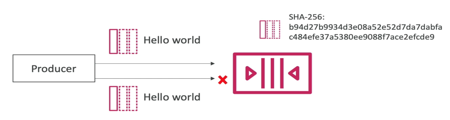

In [17]:
from PIL import Image 
from IPython.display import display

img = Image.open('content.jpeg')
new_image = img.resize((450, 120))
display(new_image)

##### SQS Message Grouping (FIFO):
- If we specify same value for MessageGroupID in an SQS FIFO queue, we can have only 1 consumer and all messages are in order
- If we need ordering of subnet of messages, then use different MessageGroupID
    - Each MessageGroupID will have their messages ordered
    - Each MessageGroupID will have its own consumer (parallel processing)
    - Ordering MessageGroupID is not guaranteed

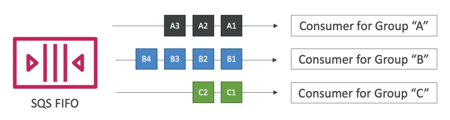

In [18]:
from PIL import Image 
from IPython.display import display

img = Image.open('grouping.jpeg')
new_image = img.resize((450, 120))
display(new_image)